In [155]:
#Importing
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

# Alpha Advantage API

In [2]:
#Alpha Advantage
from alpha_vantage.timeseries import TimeSeries
key='LODCUBAQXN7V7VS3'

In [4]:
ts = TimeSeries(key, output_format='pandas')
MSAPI, meta = ts.get_daily('MSFT')

In [5]:
MSAPI

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-21,298.890,300.1400,294.9000,299.16,28107855.0
2022-03-18,295.370,301.0000,292.7300,300.43,42195837.0
2022-03-17,293.290,295.6100,289.3700,295.22,30816633.0
2022-03-16,289.110,294.5700,283.2000,294.39,37826329.0
2022-03-15,280.350,287.8200,278.7250,287.15,34245085.0
...,...,...,...,...,...
2021-11-02,330.310,333.4500,330.0000,333.13,25719044.0
2021-11-01,331.355,331.4900,326.3700,329.37,26840400.0
2021-10-29,324.130,332.0000,323.9000,331.62,34765982.0


In [6]:
MSAPI.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [7]:
MSAPI.head()

,Open,High,Low,Close,Volume
date,,,,,
2022-03-21,298.89,300.14,294.900,299.16,28107855.0
2022-03-18,295.37,301.00,292.730,300.43,42195837.0
2022-03-17,293.29,295.61,289.370,295.22,30816633.0
2022-03-16,289.11,294.57,283.200,294.39,37826329.0
2022-03-15,280.35,287.82,278.725,287.15,34245085.0


# Microsoft Stock CSV

In [8]:
MCSV=pd.read_csv('Microsoft_Stock.csv')

In [9]:
MCSV

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [10]:
# Aligning df with MSAPI df using datetime function
import datetime
MCSV['Date']= pd.to_datetime(MCSV['Date']).dt.date
MSCV1=MCSV.set_index(pd.to_datetime(MCSV['Date']))
MSCV1.drop('Date', inplace=True, axis=1)
MSCV1.index.rename('date', inplace=True)

In [11]:
MSCV1.head()

,Open,High,Low,Close,Volume
date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438


# Merging MCSV & MSAPI

In [13]:
# Merging, Sorting and appending
merge=pd.concat([MSCV1, MSAPI])
merge.sort_values('date', inplace=True)
merge['Daily Growth']= merge['Open'] - merge['Close']
merge

,Open,High,Low,Close,Volume,Daily Growth
date,,,,,,
2015-04-01,40.60,40.76,40.310,40.72,36865322.0,-0.12
2015-04-02,40.66,40.74,40.120,40.29,37487476.0,0.37
2015-04-06,40.34,41.78,40.180,41.55,39223692.0,-1.21
2015-04-07,41.61,41.91,41.310,41.53,28809375.0,0.08
2015-04-08,41.48,41.69,41.040,41.42,24753438.0,0.06
...,...,...,...,...,...,...
2022-03-15,280.35,287.82,278.725,287.15,34245085.0,-6.80
2022-03-16,289.11,294.57,283.200,294.39,37826329.0,-5.28
2022-03-17,293.29,295.61,289.370,295.22,30816633.0,-1.93


# Stock price & Trading Volume graph

In [101]:
#Custom function
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel, weight='bold')
    axes.set_ylabel(ylabel, color=color, weight='bold')
    axes.tick_params('y', colors=color)
    ax.set_title('Stock Price and Trading Volume', weight='bold')
    ax.set_facecolor('xkcd:mint green')
    ax.grid(False)
    plt.grid(b=None)

Text(2021-02-02 00:00:00, 65000000, 'Covid Crash')

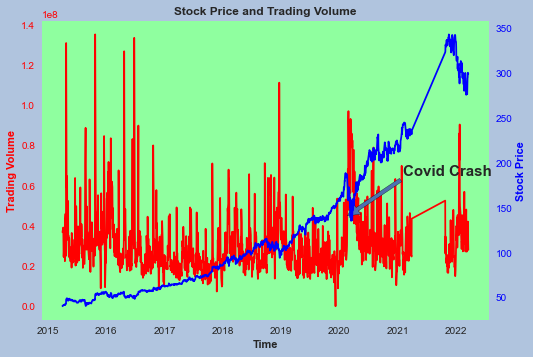

In [102]:
fix, ax= plt.subplots(facecolor='lightsteelblue')

plot_timeseries(ax, merge.index, merge['Volume'], 'r', 'Time', 'Trading Volume')
ax2 = ax.twinx()
plot_timeseries(ax2, merge.index, merge['Close'], 'blue', 'Time', 'Stock Price')
ax.annotate("Covid Crash", xy=(pd.Timestamp('2020-02-21'),45000000), weight ='bold', fontsize=15, xytext=(pd.Timestamp('2021-02-02'), 65000000), arrowprops={})

# PGATour Data

In [29]:
pga=pd.read_csv('pgaTourData.csv')

In [30]:
pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [31]:
#Data Cleaning
# Replace NaN with 0 in Top 10 
pga['Top 10'].fillna(0, inplace=True)
pga['Top 10'] = pga['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
pga['Wins'].fillna(0, inplace=True)
pga['Wins'] = pga['Wins'].astype(int)

# Drop NaN values 
pga.dropna(axis = 0, inplace=True)

# Remove the $ and commas in money 
pga['Money'] = pga['Money'].apply(lambda x: x.replace('$',''))
pga['Money'] = pga['Money'].apply(lambda x: x.replace(',',''))
pga['Money'] = pga['Money'].apply(lambda x: x.replace(' ',''))
pga['Money'] = pga['Money'].astype(float)

In [47]:
pga.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [145]:
#How much did Phil Mickelson earn in 2013?
PM13 = pga.loc[(pga['Player Name']=='Phil Mickelson') & (pga['Year']==2013), 'Money']
print('Phil Mickelsons 2013 earnings: ' + str(PM13.values[0]))

Phil Mickelsons 2013 earnings: 5495793.0


In [316]:
# Players with the most wins in one season
Winners= pga[['Year','Player Name','Wins']].copy()
Winners.sort_values(by='Wins', inplace=True, ascending=False)
print(Winners.head())

     Year       Player Name  Wins
997  2013       Tiger Woods     5
647  2015     Jordan Spieth     4
361  2017     Justin Thomas     4
861  2014      Rory McIlroy     3
323  2017  Hideki Matsuyama     3


# Driving Distance vs Fairway % 

In [32]:
pgapiv = pga.pivot_table(values=["Avg Distance", "Fairway Percentage"], index="Year", aggfunc= np.mean)
pgapiv

,Avg Distance,Fairway Percentage
Year,,
2010,287.513542,63.366979
2011,291.089785,61.787473
2012,290.054211,61.070211
2013,287.921667,61.292000
2014,289.920455,61.576761
2015,290.206011,61.892350
2016,290.898919,60.226216
2017,292.570000,60.327895
2018,296.646354,61.469740


C:\Users\annem\AppData\Local\Temp/ipykernel_12368/1211697249.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax[0].plot(index, u, '--o', LineWidth=3)
C:\Users\annem\AppData\Local\Temp/ipykernel_12368/1211697249.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax[1].plot(index, g, '--o', LineWidth=3)


Text(0.5, 1.0, 'Driving Distance vs Fairway %')

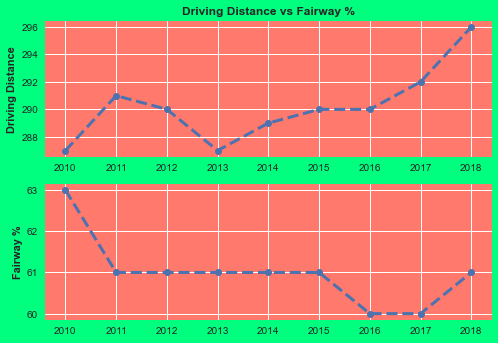

In [34]:
# Plotting Driving Distance vs Fairway's hit %
fig, ax = plt.subplots(2, 1, facecolor='springgreen')
bar_width = 0.8
opacity = 0.7
index = np.arange(2010, 2019)
u=pgapiv['Avg Distance'].astype(int)
g=pgapiv['Fairway Percentage'].astype(int)

ax[0].set_facecolor('xkcd:salmon')
ax[1].set_facecolor('xkcd:salmon')
ax[0].plot(index, u, '--o', LineWidth=3)
ax[1].plot(index, g, '--o', LineWidth=3)
ax[0].set_ylabel("Driving Distance", weight='bold')
ax[1].set_ylabel("Fairway %", weight='bold')
ax[0].set_title('Driving Distance vs Fairway %', weight='bold')

# Boxplot, showing changes in Stats over time

Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


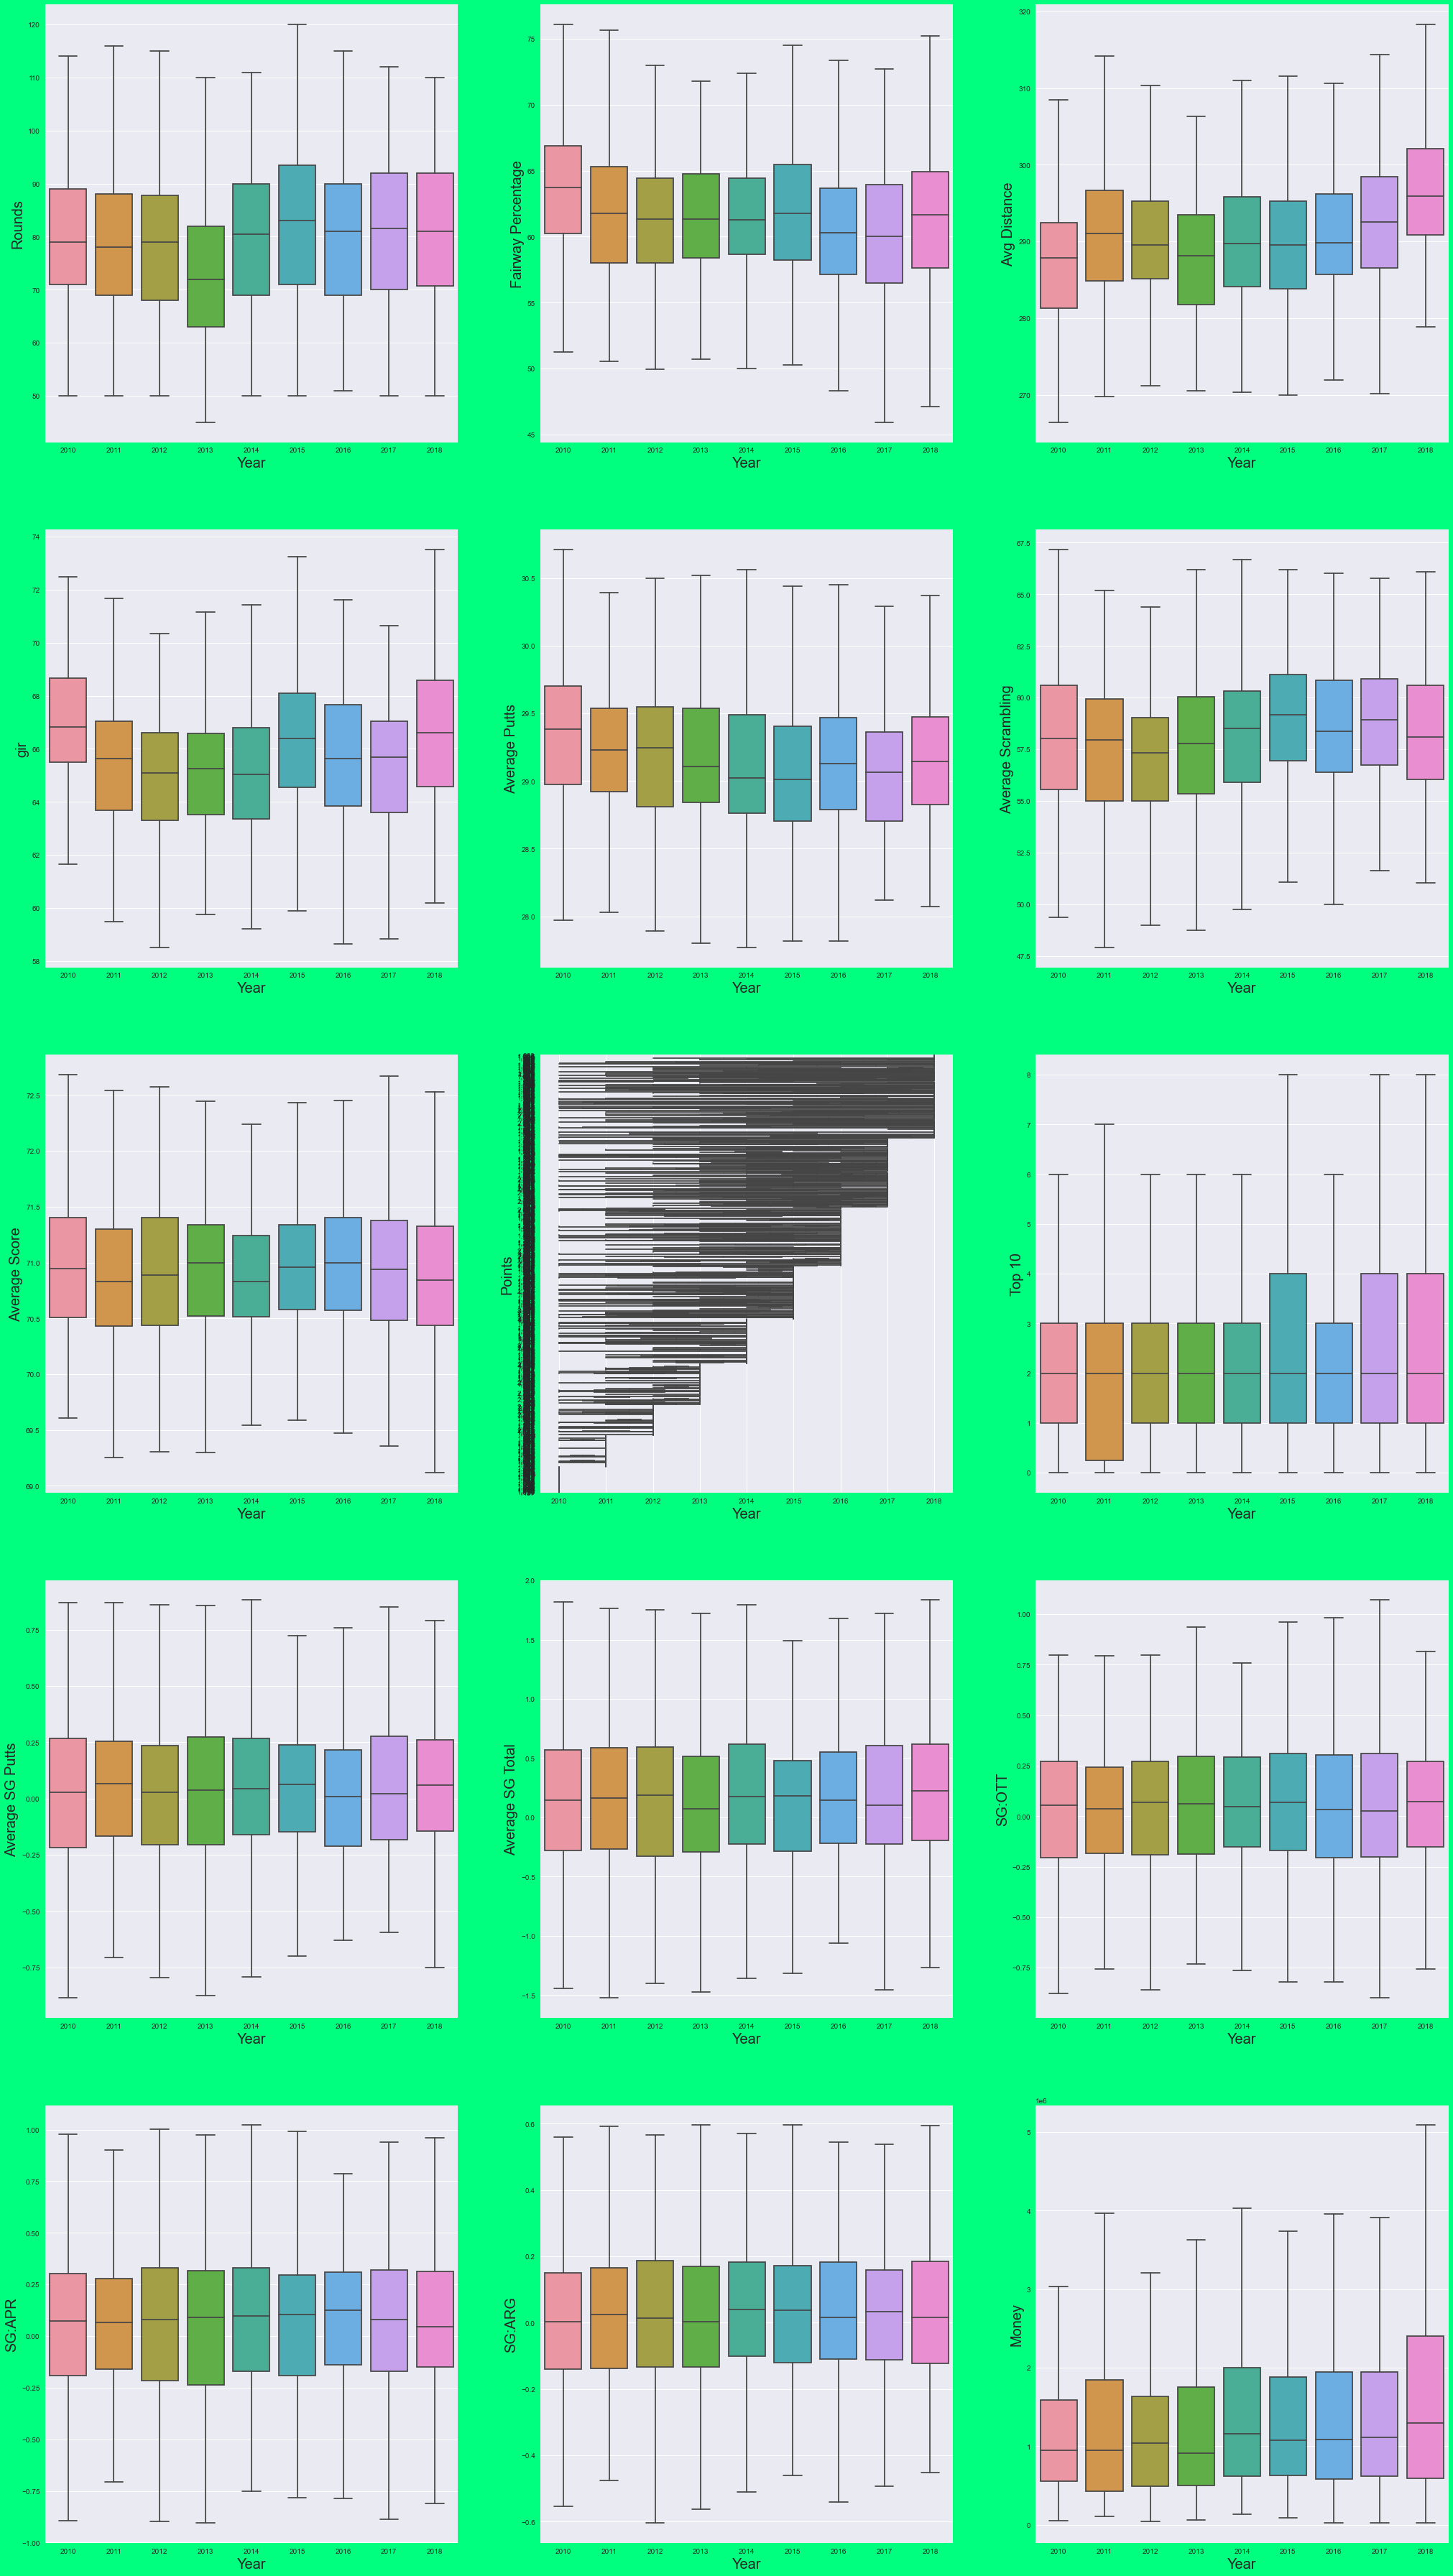

In [35]:
# Looking at the changes in statistics over time 
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65), facecolor='springgreen')
distribution = pga.loc[:,(pga.columns!='Player Name') & (pga.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=pga, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

# Correlation matrix between variables 

<AxesSubplot:>

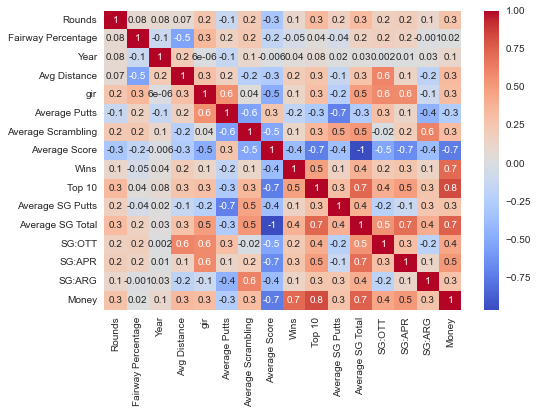

In [75]:
# Plot the correlation matrix between variables 
corr = pga.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm', annot=True, fmt='.1g')

# Top players vs All players Mean Performance

In [45]:
#Identifying the top players based on Money and Wins
Top_players=pga.loc[(pga['Money']>5000000) & (pga['Wins']>2) ]
Top_players

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
124,Dustin Johnson,77.0,59.46,2018,314.0,70.57,28.47,62.50,68.698,"2,717",3,10,0.385,2.372,0.919,0.829,0.238,8457352.0
137,Justin Thomas,91.0,58.41,2018,311.8,68.77,28.33,62.47,69.118,"2,634",3,8,0.272,1.835,0.408,0.844,0.311,8694821.0
141,Bubba Watson,90.0,58.27,2018,313.1,68.21,29.33,56.64,70.384,"1,879",3,5,0.001,0.555,0.780,0.005,-0.231,5793748.0
303,Jordan Spieth,85.0,59.48,2017,295.0,69.97,28.34,61.75,68.846,"2,671",3,8,0.278,1.988,0.321,0.896,0.429,9433033.0
323,Hideki Matsuyama,83.0,57.61,2017,302.9,69.14,28.96,61.25,69.624,"2,869",3,7,-0.345,1.058,0.508,0.758,0.346,8380570.0
336,Dustin Johnson,77.0,56.44,2017,314.4,69.61,29.00,62.63,69.549,"2,466",3,7,0.019,1.972,1.071,0.670,0.121,8732193.0
361,Justin Thomas,86.0,54.09,2017,309.3,67.33,28.29,60.54,69.359,"2,689",4,9,0.332,1.724,0.452,0.738,0.289,9921560.0
563,Jason Day,76.0,50.46,2016,304.2,67.23,28.06,61.92,69.313,"2,735",3,9,1.130,2.118,0.186,0.426,0.375,8045112.0
647,Jordan Spieth,91.0,62.91,2015,291.8,67.87,27.82,65.03,68.938,"4,169",4,14,0.571,2.154,0.494,0.618,0.471,12030465.0
729,Jason Day,75.0,55.94,2015,313.7,70.83,28.44,65.34,69.161,"2,459",3,8,0.586,2.106,0.772,0.461,0.287,9403330.0


In [146]:
cols = ['Avg Distance', 'gir', 'Wins', 'Average SG Total','Money']
TP_mean = pd.DataFrame(Top_players[cols].mean(), columns=['mean_values']).round(decimals=1)
pga_mean= pd.DataFrame(pga[cols].mean(), columns=['mean_values']).round(decimals=1)
TP_mean

,mean_values
Avg Distance,305.2
gir,68.7
Wins,3.3
Average SG Total,1.8
Money,8403278.1


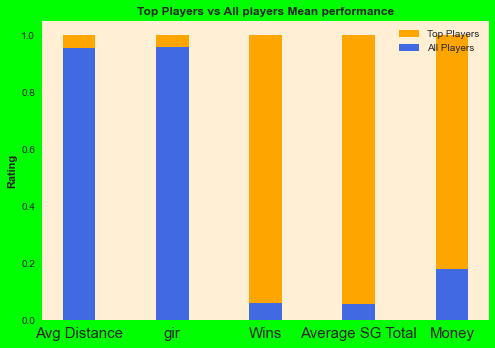

In [87]:
pga_mean_per= pga_mean['mean_values']/TP_mean['mean_values']
TP_mean_per=TP_mean['mean_values']/TP_mean['mean_values']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(facecolor='lime')

ax.bar(TP_mean_per.index, TP_mean_per, width, color='orange', label='Top Players')
ax.bar(pga_mean_per.index, pga_mean_per,width, label='All Players', color= 'royalblue')

ax.set_facecolor('papayawhip')
ax.grid(False)
ax.set_ylabel('Rating', weight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.set_title('Top Players vs All players Mean performance', weight='bold')
ax.legend()

plt.show()

# Dictionary of Players Names and Avg driving distance

In [144]:
a = pga['Avg Distance'].to_numpy()
b = pga['Player Name'].to_numpy()
dict = {}
for A, B in zip(a, b):
    dict[A] = B
for key, value in dict.items():
        print(str(value) + ' hits the ball on average ' + str(key) + ' yds')

Bill Lunde hits the ball on average 291.5 yds
Rod Pampling hits the ball on average 283.5 yds
Derek Fathauer hits the ball on average 286.5 yds
Nicholas Thompson hits the ball on average 289.2 yds
Brian Davis hits the ball on average 278.9 yds
Steve Stricker hits the ball on average 282.9 yds
Alex Prugh hits the ball on average 295.7 yds
Steve Marino hits the ball on average 295.2 yds
Paul Casey hits the ball on average 293.0 yds
Tim Petrovic hits the ball on average 280.5 yds
Bill Lunde hits the ball on average 288.9 yds
Justin Rose hits the ball on average 295.1 yds
Sergio Garcia hits the ball on average 292.7 yds
Webb Simpson hits the ball on average 285.4 yds
Tag Ridings hits the ball on average 299.6 yds
Vijay Singh hits the ball on average 295.4 yds
Tim Herron hits the ball on average 291.7 yds
Woody Austin hits the ball on average 281.1 yds
Shaun Micheel hits the ball on average 286.1 yds
David Lutterus hits the ball on average 291.9 yds
Jeff Overton hits the ball on average 297